![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [49]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Load the data
penguins = pd.read_csv("penguins.csv")
penguins.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [50]:
# Step 2: Investigate and drop non-numeric columns
numeric_penguins = penguins.select_dtypes(include=['float64', 'int64'])

In [51]:
# Step 3: Handle missing values
numeric_penguins = numeric_penguins.dropna()

In [52]:
# Step 4: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_penguins)

In [53]:
# Step 5: Use Elbow Method to determine optimal number of clusters
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

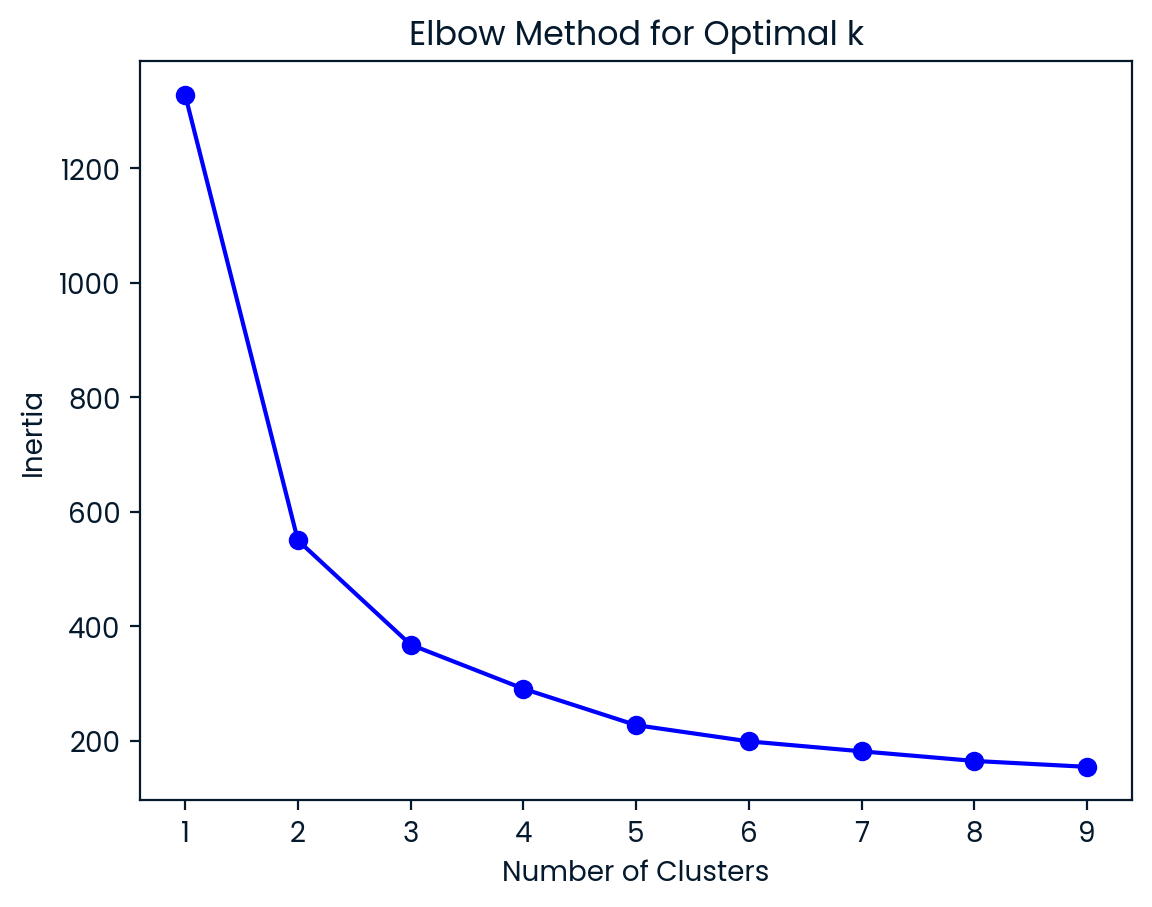

In [54]:
# Plot elbow curve
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [55]:
# Step 6: Apply KMeans with the optimal number of clusters (let’s assume 3 from elbow curve)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)


In [56]:
# Step 7: Add cluster labels to original DataFrame
numeric_penguins_clustered = numeric_penguins.copy()
numeric_penguins_clustered['cluster'] = clusters
numeric_penguins_clustered.head(10)


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,cluster
0,39.1,18.7,181.0,3750.0,2
1,39.5,17.4,186.0,3800.0,2
2,40.3,18.0,195.0,3250.0,2
3,36.7,19.3,193.0,3450.0,2
4,39.3,20.6,190.0,3650.0,2
5,38.9,17.8,181.0,3625.0,2
6,39.2,19.6,195.0,4675.0,2
7,41.1,17.6,182.0,3200.0,2
8,38.6,21.2,191.0,3800.0,2
9,36.6,17.8,185.0,3700.0,2


In [57]:
# Step 8: Compute cluster-wise means
stat_penguins = numeric_penguins_clustered.groupby('cluster').mean().reset_index()